<a href="https://colab.research.google.com/github/shouvikpal8991/Assign2-computational/blob/main/Assig_2pr_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

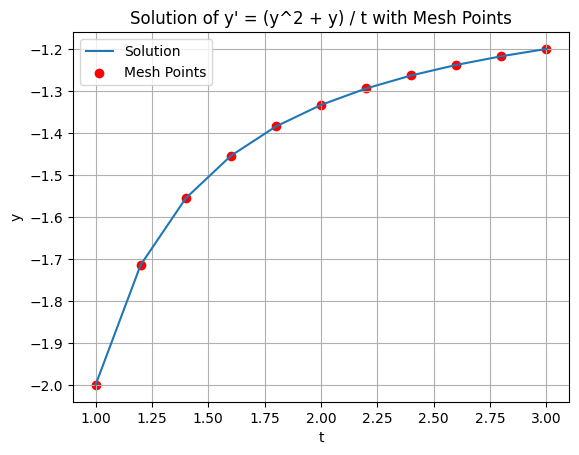

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return (y**2 + y) / t

def runge_kutta_step(t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def adaptive_runge_kutta(t0, y0, h0, t_end, tol):
    t_values = [t0]
    y_values = [y0]
    mesh_points = [(t0, y0)]
    h=h0
    while t0 < t_end:
        y1 = runge_kutta_step(t0, y0, 2*h)
        y2 = runge_kutta_step(t0, y0,  h)
        y2 = runge_kutta_step(t0 +  h, y2,  h)
        error = np.abs(y2 - y1)
        rho= (tol*h*30)/error
        if rho>1:
            t0 += 2*h
            y0 = y2
            t_values.append(t0)
            y_values.append(y0)
            mesh_points.append((t0, y0))
        else:
          h=h*(rho)**(0.25)
    return t_values, y_values, mesh_points


t_values, y_values, mesh_points = adaptive_runge_kutta(1, -2, 0.1, 3, 1e-4)

plt.plot(t_values, y_values, label='Solution')
mesh_t, mesh_y = zip(*mesh_points)
plt.scatter(mesh_t, mesh_y, color='red', label='Mesh Points')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of y\' = (y^2 + y) / t with Mesh Points')
plt.legend()
plt.grid(True)
plt.show()
